# Intro

In this program, my first introduction to ML, I examined data representing possums that has 46 observations and 6 variables:
* sex: Sex, either m (male) or f (female).
* age: Age in years.
* headL: Head length, in mm.
* skullW: Skull width, in mm.
* totalL: Total length, in cm.
* tailL: Tail length, in cm.


## Preliminaries

In [3]:
# Import all the necessary packages: 
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import scipy.stats as ss 
import scipy.optimize as so
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline

# Simple Linear Regression
First I read the dataset and plotted a relationship of the age and tailL columns.
Then I created a function `linearModelPredict` to compute linear model predictions given data 
and a coefficient vector.  The function should take as it's arguments a 1d-array of coefficients `b`
and the design matrix `X` as a 2d-array and return linear model predictions `yp`.

<Axes: xlabel='age', ylabel='tailL'>

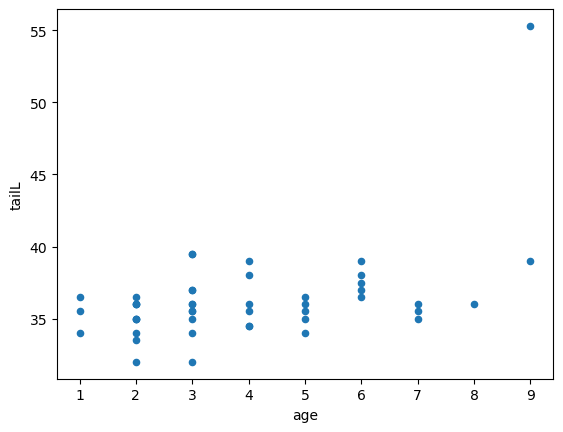

In [4]:

import pandas as pd
possum_data = pd.read_csv("possum.csv")
possum_data.plot(
    x='age',
    y='tailL',
    kind = 'scatter')



In [5]:
def linearModelPredict(b,X):
 
    yp = X @ b
    return (yp)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
linearModelPredict(b,X)



array([ 0.1, -0.2,  0.7])

# Loss Function
After that I wanted to find my loss function `linearModelLossRSS` which computes and returns the loss
function for an OLS model parameterized by beta, as well as the gradient of the loss. As well as
reporting the 'RSS' and 'gradient'


In [6]:
def linearModelLossRSS(b,X,y):
    predi = linearModelPredict(b,X)
    #find my outcomes
    res = y-predi
    res_sos = sum(res**2)
    # OLS loss function from Lec 2
    gradient= -2*(res@X)
    #normal gradient, [b-value], [m-value]
    
    return(res_sos,gradient)



X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
print("RSS  Gradient: ")
linearModelLossRSS(b,X,y)

    

RSS  Gradient: 


(2.06, array([-3.6, -4. ]))

# Minimizing the Loss Function
I created a function `linearModelFit` to fit a linear model.  The function takes as its first argument
 the design matrix `X` as a 2d-array, as its second argument a 1d-array `y` of outcomes, and as its third argument a function  
`lossfcn` which returns as a tuple the value of the loss, as well as the gradient of the loss. As a result, it should return 
the estimated betas and the R2 and report those two

In [7]:
def linearModelFit(X,y,lossfcn=linearModelLossRSS):
    row,col = X.shape
    #copy matrix size
    
    betas=np.zeros((col,1))

    RES = so.minimize(lossfcn,betas.flatten(),args=(X,y),jac=True)
    #Read doc on so.minimzie
    estimated_betas=RES.x 
    # .x finds the optimized values (scripty library)
    res = y-np.mean(y)
    TSS = sum(res**2)
    RSS,deriv = linearModelLossRSS(estimated_betas,X,y)
    R2 = 1-RSS/TSS 
    
    return(estimated_betas,R2)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2])
linearModelFit(X,y,linearModelLossRSS)


    
    

(array([0.6, 0.6]), 0.75)

# Fitting model to the possum data
Plotting my model to fit with the possum dataset


R2:  0.22286587947604064
Betas:  [33.35046603  0.75372837]


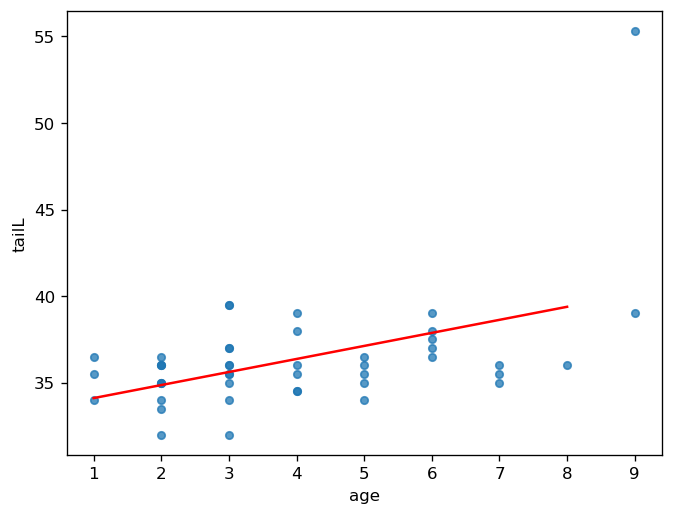

In [8]:

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', 
                         y = 'tailL', 
                         alpha = 0.75,
                         ax = ax)

y = possum_data.tailL.values
age = possum_data.age.values
nth = age.size
X = np.c_[np.ones(nth), age]
actual_betas, actual_R2 = linearModelFit(X,y)

age_axi = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_axi.size), age_axi]
yn = Xn@actual_betas

ax.plot(age_axi, yn, color = 'red')

print("R2: ",actual_R2)
print("Betas: ",actual_betas)

# LAD Regression
Creating a function `linearModelLossLAD` which computes the least absolute deviation loss function for a linear model  parameterized by beta,
 as well as the gradient of the loss.  The function should take as its first argument a 1d-array `beta` of coefficients for the linear model,
 as its second argument the design matrix `X` as a 2d-array, and as its third argument a 1d-array `y` of observed outcomes.
Then I used those functions to fit my 'LAD' Model, fit it to a scatter plot, and made predictions along a grid
of equally spaced possum ages

In [9]:
def linearModelLossLAD(b,X,y):
    predY = linearModelPredict(b,X)
    res = y-predY
    sres = np.sign(res); 
    sum_abs_dev = sum(abs(res))
    grad =- (sres @ X)
    return (sum_abs_dev,grad)

X = np.array([[1,0],[1,-1],[1,2]])
b = np.array([0.1,0.3])
y = np.array([0,0.4,2]) 
linearModelLossLAD(b,X,y)


(2.0, array([-1., -1.]))

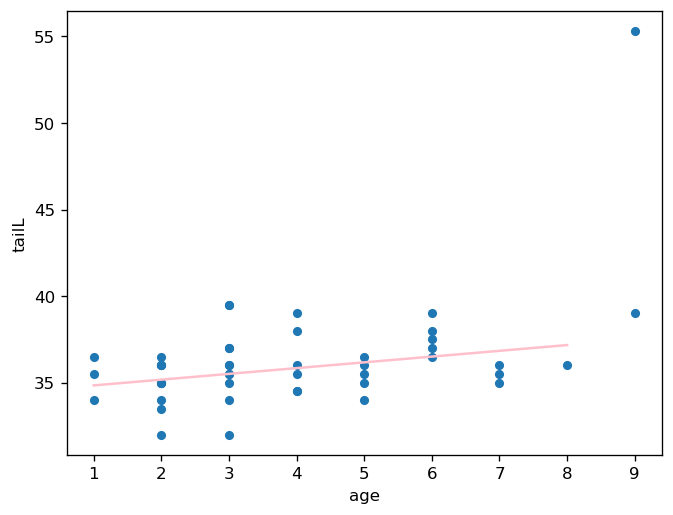

In [10]:

age = possum_data.age.values
X = np.c_[np.ones(age.size), age]

y = possum_data.tailL.values

b, R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)  # Use LAD loss function
fig, ax = plt.subplots(dpi=120)
possum_data.plot.scatter(x='age',
                         y='tailL',
                         ax=ax)

age = possum_data.age.values
nth = age.size
X = np.c_[np.ones(nth), age]
actual_betas, actual_R2 = linearModelFit(X, y, lossfcn=linearModelLossLAD)  # Use LAD loss function

age_axi = np.arange(age.min(), age.max())
Xn = np.c_[np.ones(age_axi.size), age_axi]
yn = Xn @ actual_betas

ax.plot(age_axi, yn, color='pink')

# Using statsmodels to fit an OLS model and a LAD model

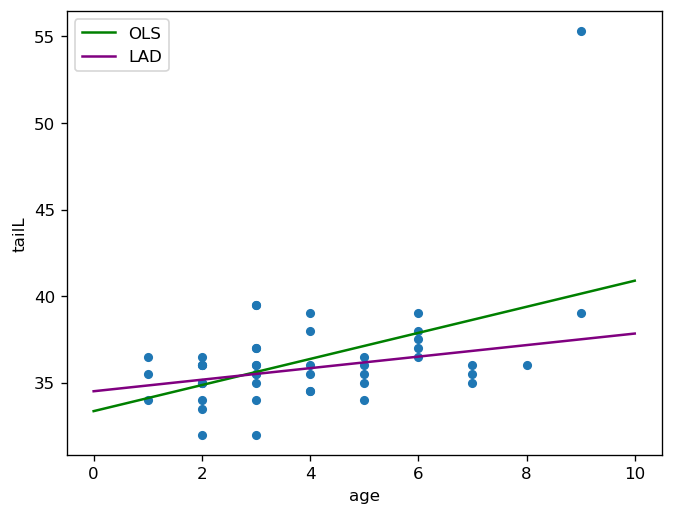

In [11]:
ols_fit = smf.ols('tailL~age', data = possum_data).fit()
sad_fit = smf.quantreg('tailL~age', data = possum_data).fit(q = 0.5)

fig, ax = plt.subplots(dpi = 120)
possum_data.plot.scatter(x = 'age', y ='tailL', ax = ax)

age = np.linspace(0,10,100)
y_ols = ols_fit.predict(exog = dict(age = age)).values
y_sad = sad_fit.predict(exog = dict(age = age)).values

ax.plot(age, y_ols, color = 'green', label = 'OLS')
ax.plot(age, y_sad, color = 'purple', label = 'LAD')
ax.legend()



# Observations 
The R-squared values obtained from statsmodels and custom linear models represent the goodness-of-fit of the respective models to the data. The similarity between these values depends on the
 specific data and models used, but they may or may not be similar, as different models and loss functions can lead to varying R-squared values for the same dataset. But they are quite similar in this data set.